# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [0]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Obtain the train data

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\BALARAMI REDDY\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2403,0.302769,-0.007871,-0.07725,-0.954795,-0.868161,-0.911811,-0.961271,-0.888693,-0.911848,-0.88379,...,0.041789,0.369763,-0.028929,-0.958323,-0.51105,0.24153,0.331883,14,5,STANDING


In [0]:
train.shape

(7352, 564)

# Obtain the test data

In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

C:\Users\BALARAMI REDDY\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2430,0.272074,-0.015423,-0.051673,-0.989788,-0.974372,-0.924292,-0.991696,-0.9744,-0.928182,-0.926529,...,0.022265,0.004937,-0.536551,0.19756,-0.739285,-0.085076,0.00231,20,4,SITTING


In [0]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

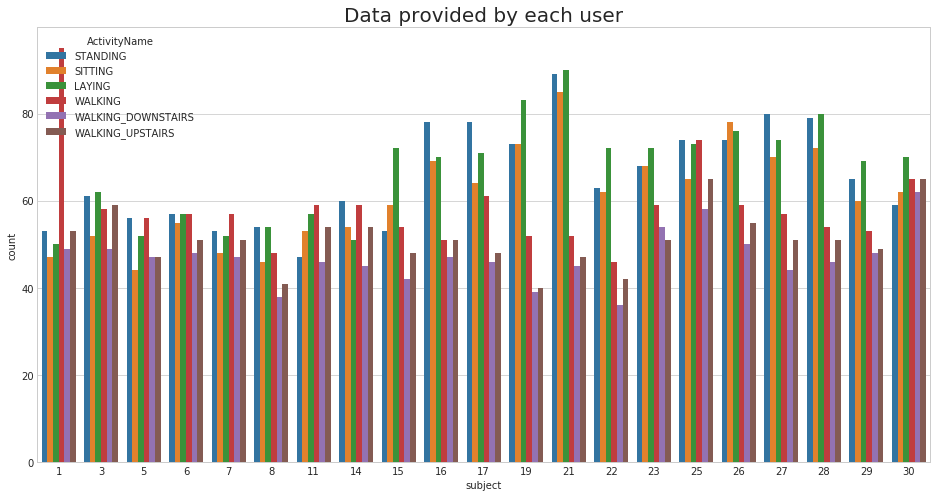

In [0]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


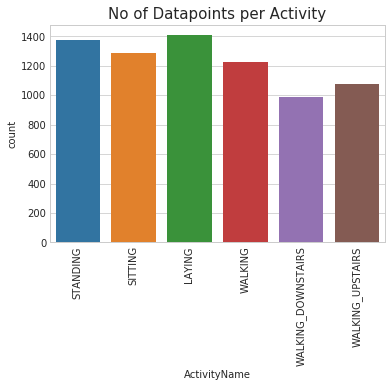

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()


### Observation 

1. Our data is well balanced (almost)

# 4. Changing feature names

In [0]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# 5. Save this dataframe in a csv files

In [0]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

C:\Users\BALARAMI REDDY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


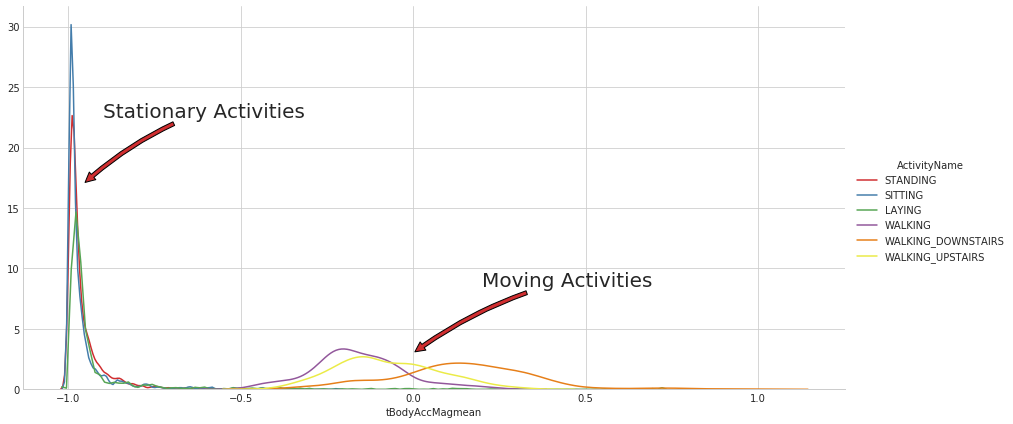

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()


C:\Users\BALARAMI REDDY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


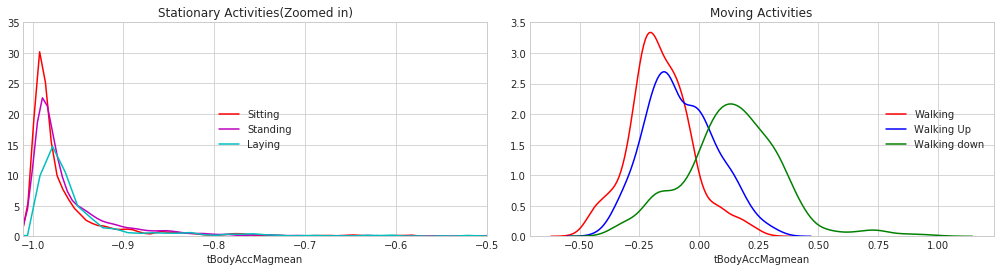

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

## 3. Magnitude of an acceleration can saperate it wel 

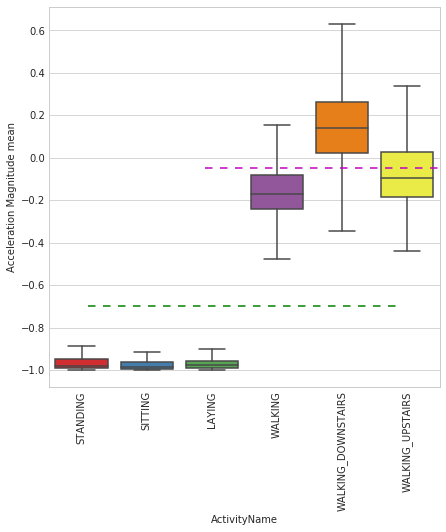

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()


## 4. Position of GravityAccelerationComponants also matters

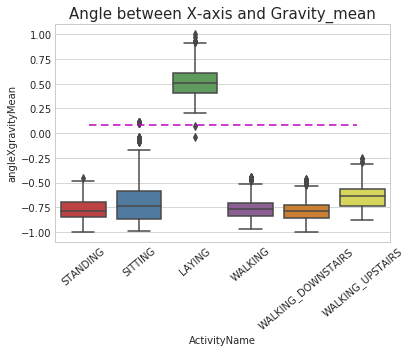

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

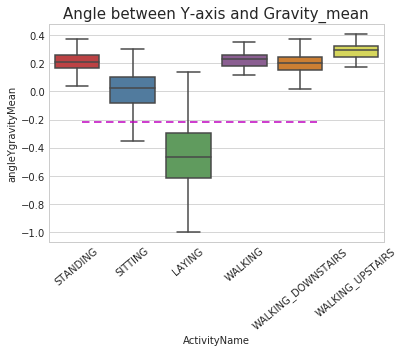

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.838s...
[t-SNE] Computed neighbors for 7352 samples in 86.791s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.142s
[t-SNE] Iteration 50: error = 124.7675247, gradient norm = 0.0255740 (50 iterations in 101.337s)
[t-SNE] Iteration 100: error = 107.6125488, gradient norm = 0.0274877 (50 iterations 

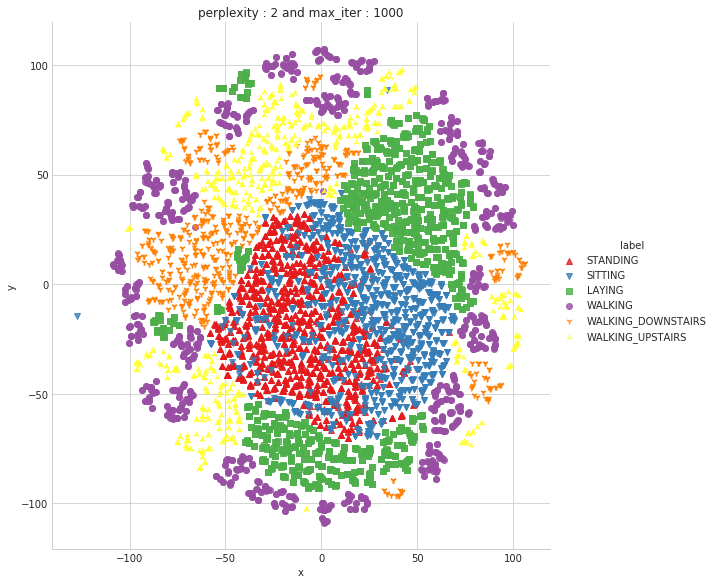

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.558s...
[t-SNE] Computed neighbors for 7352 samples in 84.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 114.1764755, gradient norm = 0.0184469 (50 iterations in 27.618s)
[t-SNE] Iteration 100: error = 97.7323837, gradient norm = 0.0147993 (50 iterati

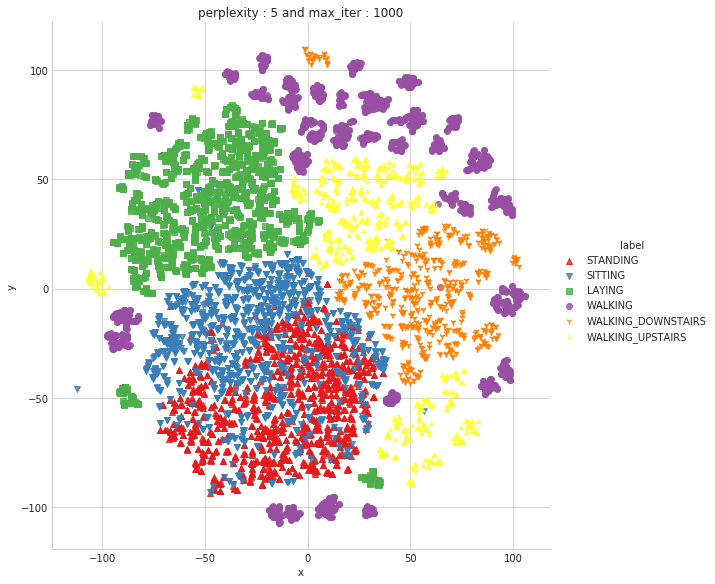

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.583s...
[t-SNE] Computed neighbors for 7352 samples in 102.330s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.194s
[t-SNE] Iteration 50: error = 105.3449936, gradient norm = 0.0255474 (50 iterations in 29.931s)
[t-SNE] Iteration 100: error = 89.9901810, gradient norm = 0.0107842 (50 itera

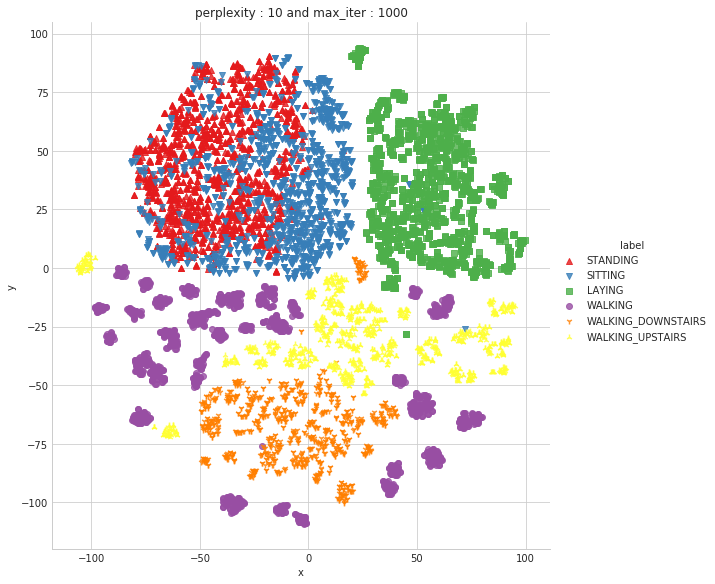

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.538s...
[t-SNE] Computed neighbors for 7352 samples in 85.907s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.375s
[t-SNE] Iteration 50: error = 97.6168213, gradient norm = 0.0183816 (50 iterations in 22.252s)
[t-SNE] Iteration 100: error = 84.0879593, gradient norm = 0.0061127 (50 iterati

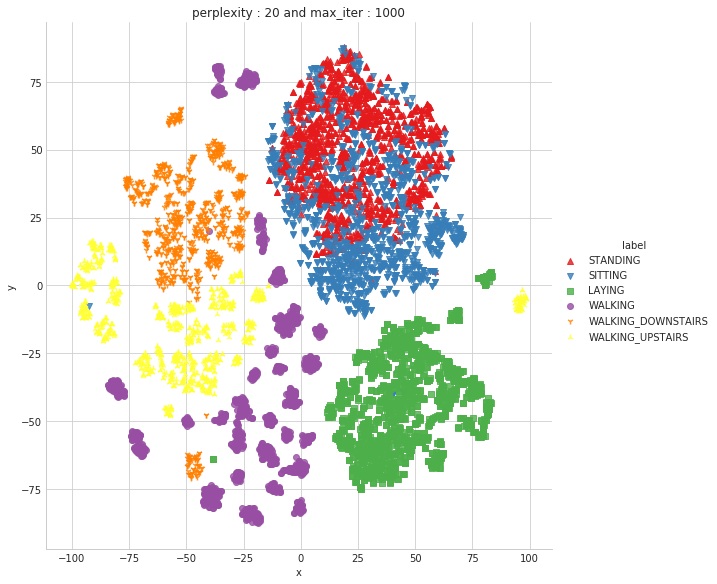

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.595s...
[t-SNE] Computed neighbors for 7352 samples in 91.571s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.919s
[t-SNE] Iteration 50: error = 86.9809418, gradient norm = 0.0147315 (50 iterations in 30.587s)
[t-SNE] Iteration 100: error = 75.5526047, gradient norm = 0.0040142 (50 iterat

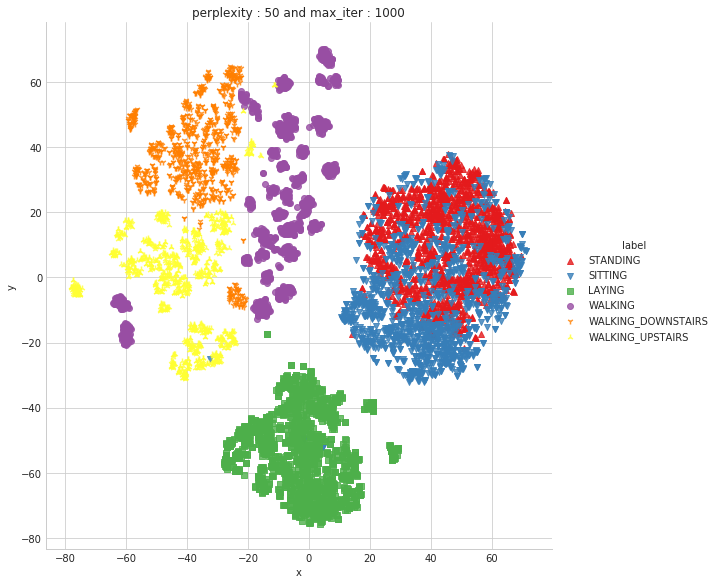

Done


In [0]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Obtain the train and test data

In [0]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [0]:
train.head(3)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [0]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix 

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specifie

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.5min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:44.602273


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010975


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


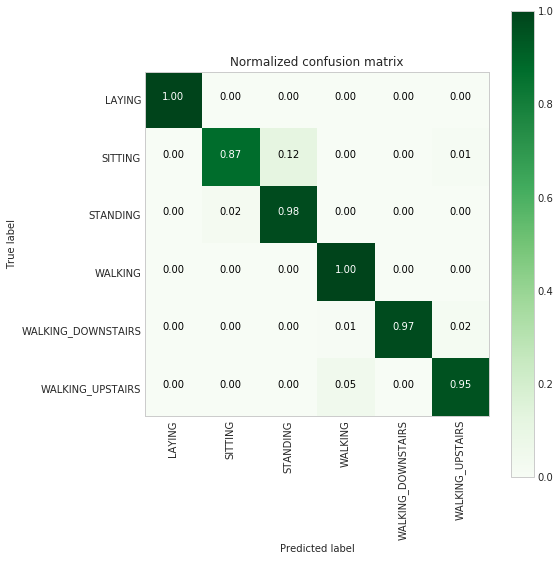

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [0]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

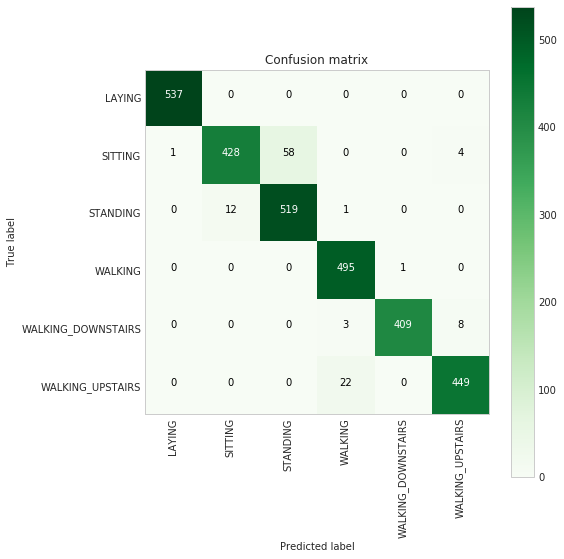

In [0]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [0]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



# 2. Linear SVC with GridSearch

In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:19.510271


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012008


---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 430  56   0   0   3]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


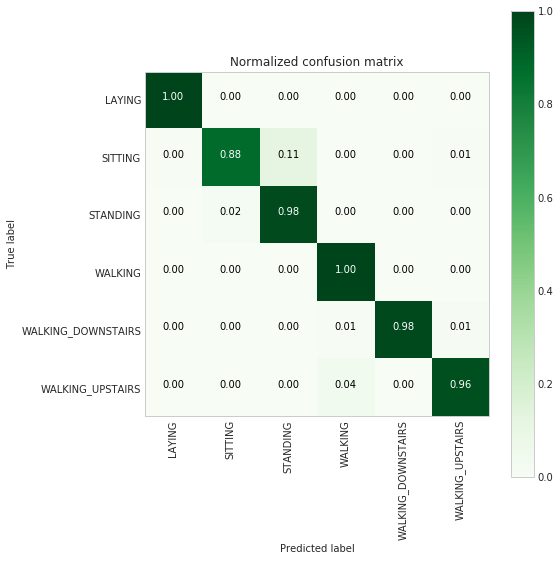

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.97      0.97      0.97      2947



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(lr_svc_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



# 3. Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:11:40.677845


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.421593


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


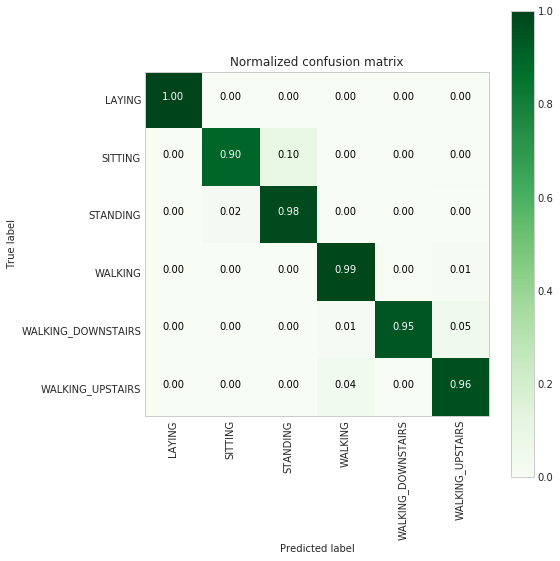

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(rbf_svm_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:26.000829


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012968


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  13 346  61]
 [  0   0   0  78  24 369]]


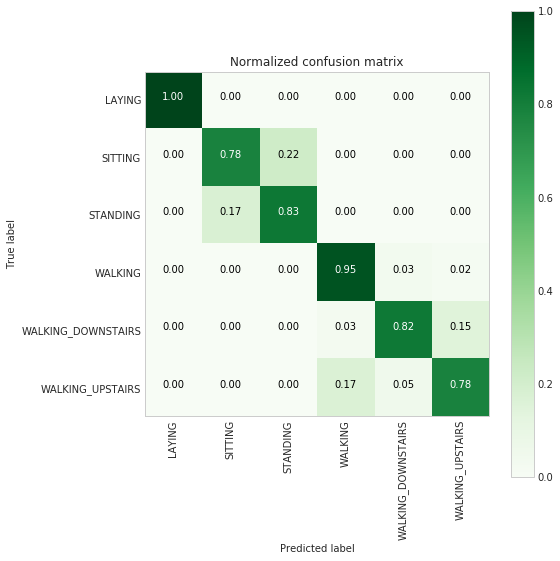

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

C:\Users\BALARAMI REDDY\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:12:14.172213


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.130223


---------------------
|      Accuracy      |
---------------------

    0.9127926705123854


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 424  67   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  37 339  44]
 [  0   0   0  51   6 414]]


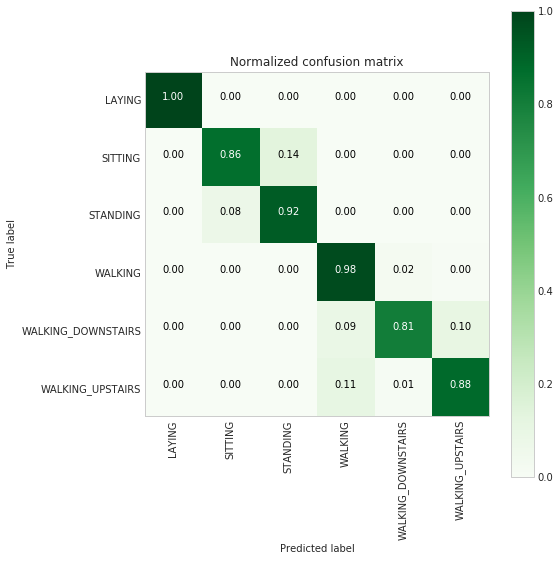

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.89       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.85      0.98      0.91       496
WALKING_DOWNSTAIRS       0.95      0.81      0.87       420
  WALKING_UPSTAIRS       0.90      0.88      0.89       471

       avg / total       0.92      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=Fals

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6. Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:23:12.742865


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.168552


---------------------
|      Accuracy      |
---------------------

    0.9212758737699356


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 395  95   0   0   1]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  32   6 432]]


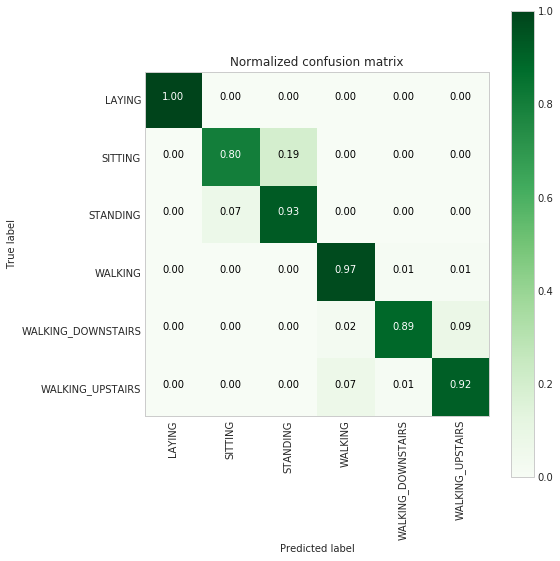

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.80      0.85       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.71%       3.291% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.28%      8.721% 
GradientBoosting DT : 91.28%      8.721% 


# Deep Learning Models

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 database.sqlite  'Logistic Regression.ipynb'   SGD.ipynb
 Db-IMDB.db	   model.py		       'sql_question (1).pdf'
 driving_data.py   NB.ipynb		        SVM.ipynb
 driving_dataset  'Netflix (1).ipynb'	        TruncatedSVD.ipynb
 DT.ipynb	   Reviews.csv		        UCI_HAR_Dataset
 imdb.db	   RF.ipynb		        Untitled2.ipynb
 KNN.ipynb	   Self_Driving_Car.ipynb       Untitled.ipynb


In [0]:
# Data directory
#data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')
DATADIR = '/content/drive/My Drive/Colab Notebooks/UCI_HAR_Dataset'

In [0]:
ls /content/drive/My\ Drive/Colab\ Notebooks \ UCI_HAR_Dataset

ls: cannot access ' UCI_HAR_Dataset': No such file or directory
'/content/drive/My Drive/Colab Notebooks':
 database.sqlite   'Logistic Regression.ipynb'   SGD.ipynb
 Db-IMDB.db         model.py                    'sql_question (1).pdf'
 driving_data.py    NB.ipynb                     SVM.ipynb
 driving_dataset/  'Netflix (1).ipynb'           TruncatedSVD.ipynb
 DT.ipynb           Reviews.csv                  UCI_HAR_Dataset/
 imdb.db            RF.ipynb                     Untitled2.ipynb
 KNN.ipynb          Self_Driving_Car.ipynb       Untitled.ipynb


In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/Colab Notebooks/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/My Drive/Colab Notebooks/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
#np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


# LSTM

## LSTM with single layer


In [0]:
epochs = 20
batch_size = 32
n_hidden = 128
pv = 0.5

In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(pv))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               70656     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# Training the model
histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 39s 5ms/step - loss: 1.1075 - acc: 0.5030 - val_loss: 1.1510 - val_acc: 0.5124
Epoch 2/20
7352/7352 [==============================] - 37s 5ms/step - loss: 0.8218 - acc: 0.6306 - val_loss: 0.7575 - val_acc: 0.6152
Epoch 3/20
7352/7352 [==============================] - 37s 5ms/step - loss: 0.7112 - acc: 0.6447 - val_loss: 0.7449 - val_acc: 0.5931
Epoch 4/20
7352/7352 [==============================] - 37s 5ms/step - loss: 0.6794 - acc: 0.6351 - val_loss: 0.8065 - val_acc: 0.5755
Epoch 5/20
7352/7352 [==============================] - 37s 5ms/step - loss: 0.6395 - acc: 0.6635 - val_loss: 0.7900 - val_acc: 0.6105
Epoch 6/20
7352/7352 [==============================] - 38s 5ms/step - loss: 0.6385 - acc: 0.6608 - val_loss: 0.6919 - val_acc: 0.6481
Epoch 7/20
7352/7352 [==============================] - 37s 5ms/step - loss: 0.5359 - acc: 0.7417 - val_loss: 0.5296 - val_acc: 0.8052
Epoch 8

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      328  ...                   0                 2
STANDING                 0       38  ...                   0                 0
WALKING                  0        0  ...                  11                21
WALKING_DOWNSTAIRS       0        0  ...                 418                 1
WALKING_UPSTAIRS         0        0  ...                   0               465

[6 rows x 6 columns]


In [0]:
score = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

2947/2947 [==============================] - 3s 868us/step
Accuracy: 91.75%


In [0]:
epochs = 20
batch_size = 64
n_hidden = 128
pv = 0.1

In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(pv))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               70656     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# Training the model
histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 30s 4ms/step - loss: 1.0474 - acc: 0.5586 - val_loss: 1.8126 - val_acc: 0.4710
Epoch 2/20
7352/7352 [==============================] - 27s 4ms/step - loss: 0.7839 - acc: 0.6587 - val_loss: 0.9190 - val_acc: 0.6776
Epoch 3/20
7352/7352 [==============================] - 26s 4ms/step - loss: 0.7595 - acc: 0.6538 - val_loss: 0.7777 - val_acc: 0.6491
Epoch 4/20
7352/7352 [==============================] - 26s 4ms/step - loss: 0.6482 - acc: 0.6785 - val_loss: 0.7924 - val_acc: 0.6274
Epoch 5/20
7352/7352 [==============================] - 27s 4ms/step - loss: 0.5855 - acc: 0.6884 - val_loss: 0.5962 - val_acc: 0.6997
Epoch 6/20
7352/7352 [==============================] - 27s 4ms/step - loss: 0.5140 - acc: 0.7285 - val_loss: 0.7567 - val_acc: 0.6502
Epoch 7/20
7352/7352 [==============================] - 27s 4ms/step - loss: 0.3885 - acc: 0.8294 - val_loss: 0.4895 - val_acc: 0.8558
Epoch 8

In [0]:
score = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

2947/2947 [==============================] - 3s 914us/step
Accuracy: 93.21%


## LSTM with 2 Layers

In [0]:
epochs1 = 30
batch_size1= 32
n_hidden1 = 128
n_hidden2 =64
pv1 = 0.2
pv2 = 0.5

In [0]:
# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden1, return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(pv1))

model1.add(LSTM(n_hidden2))
# Adding a dropout layer
model1.add(Dropout(pv2))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# Training the model
history = model1.fit(X_train,
                     Y_train,
                     batch_size=batch_size,
                     validation_data=(X_test, Y_test),
                     epochs=epochs1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 108s 15ms/step - loss: 1.0750 - acc: 0.5275 - val_loss: 0.8983 - val_acc: 0.5819
Epoch 2/30
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7786 - acc: 0.6357 - val_loss: 0.8009 - val_acc: 0.6698
Epoch 3/30
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7163 - acc: 0.6604 - val_loss: 1.2268 - val_acc: 0.6145
Epoch 4/30
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9102 - acc: 0.5891 - val_loss: 0.7852 - val_acc: 0.6325
Epoch 5/30
7352/7352 [==============================] - 107s 15ms/step - loss: 0.6548 - acc: 0.6824 - val_loss: 0.6727 - val_acc: 0.6970
Epoch 6/30
7352/7352 [==============================] - 107s 15ms/step - loss: 0.4596 - acc: 0.8320 - val_loss: 0.3177 - val_acc: 0.8877
Epoch 7/30
7352/7352 [==============================] - 106s 14ms/step - loss: 0.2535 - acc: 0.9173 - val_loss: 0.3701 - val_acc: 

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model1.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      412  ...                   0                 0
STANDING                 0       67  ...                   0                 0
WALKING                  0        0  ...                  20                29
WALKING_DOWNSTAIRS       0        0  ...                 397                17
WALKING_UPSTAIRS         0        0  ...                   0               452

[6 rows x 6 columns]


In [0]:
score1 = model1.evaluate(X_test, Y_test)


2947/2947 [==============================] - 4s 1ms/step


In [0]:
print("Accuracy: %.2f%%" % (score1[1]*100))

Accuracy: 91.96%


In [0]:
epochs = 20
batch_size =64
n_hidden = 128

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
#model.add(BatchNormalization())
# Adding a dropout layer
#model.add(Dropout(pv))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()


# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)


print("==============================")
score = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

W0815 11:55:18.505002 139678289241984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 11:55:18.508882 139678289241984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 11:55:18.520177 139678289241984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 11:55:18.813213 139678289241984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 11:55:18.835502 139678289241984 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 71,430
Trainable params: 71,430
Non-trainable params: 0
_________________________________________________________________


W0815 11:55:19.133373 139678289241984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 11:55:19.752544 139678289241984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 28s 4ms/step - loss: 1.3094 - acc: 0.4195 - val_loss: 1.3008 - val_acc: 0.3963
Epoch 2/20
7352/7352 [==============================] - 26s 4ms/step - loss: 1.2410 - acc: 0.4531 - val_loss: 1.2205 - val_acc: 0.4710
Epoch 3/20
7352/7352 [==============================] - 26s 4ms/step - loss: 1.1656 - acc: 0.4976 - val_loss: 1.1710 - val_acc: 0.4608
Epoch 4/20
7352/7352 [==============================] - 26s 4ms/step - loss: 1.0044 - acc: 0.5832 - val_loss: 1.0900 - val_acc: 0.5972
Epoch 5/20
7352/7352 [==============================] - 26s 4ms/step - loss: 0.7302 - acc: 0.7175 - val_loss: 0.6558 - val_acc: 0.7672
Epoch 6/20
7352/7352 [==============================] - 26s 4ms/step - loss: 0.5062 - acc: 0.8240 - val_loss: 0.4139 - val_acc: 0.8439
Epoch 7/20
7352/7352 [==============================] - 26s 4ms/step - loss: 0.3289 - acc: 0.8829 - val_loss: 0.4279 - val_acc: 0.8470
Epoch 8

In [0]:
epochs1 = 30
batch_size1= 64
n_hidden1 = 128
n_hidden2 =128
pv1 = 0.1
pv2 = 0.1

# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden1, return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(pv1))

model1.add(LSTM(n_hidden2))
# Adding a dropout layer
model1.add(Dropout(pv2))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()


# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model1.fit(X_train,
                     Y_train,
                     batch_size=batch_size,
                     validation_data=(X_test, Y_test),
                     epochs=epochs1)

print("==============================")
score = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 203,014
Trainable params: 203,014
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 71s 10ms/step - loss: 1.1304 - a

In [0]:
score1 = model1.evaluate(X_test, Y_test)

print("Accuracy: %.2f%%" % (score1[1]*100))

2947/2947 [==============================] - 6s 2ms/step
Accuracy: 92.43%


# CNN

## CNN Single Layer

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',
                 input_shape=(timesteps, input_dim)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

batch_size = 128
epochs = 30

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 7s 888us/step - loss: 0.7618 - acc: 0.6793 - val_loss: 0.6655 - val_acc: 0.7265
Epoch 2/30
7352/7352 [==============================] - 5s 676us/step - loss: 0.4210 - acc: 0.8341 - val_loss: 0.6085 - val_acc: 0.8079
Epoch 3/30
7352/7352 [==============================] - 5s 683us/step - loss: 0.2678 - acc: 0.9048 - val_loss: 0.4920 - val_acc: 0.8670
Epoch 4/30
7352/7352 [==============================] - 5s 677us/step - loss: 0.1826 - acc: 0.9327 - val_loss: 0.4821 - val_acc: 0.8863
Epoch 5/30
7352/7352 [==============================] - 5s 679us/step - loss: 0.1508 - acc: 0.9402 - val_loss: 0.4535 - val_acc: 0.8999
Epoch 6/30
7352/7352 [==============================] - 5s 679us/step - loss: 0.1332 - acc: 0.9467 - val_loss: 0.5176 - val_acc: 0.8799
Epoch 7/30
7352/7352 [==============================] - 5s 681us/step - loss: 0.1289 - acc: 0.9489 - val_loss: 0.6459 - val_acc: 0.8415


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])    

Test loss: 0.6347342224354259
Test accuracy: 0.9049881235154394


In [0]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3,
                 activation='relu',
                 input_shape=(timesteps, input_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

batch_size = 128
epochs = 30

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)


W0813 16:18:47.958996 140532760672128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 16:18:47.983665 140532760672128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0813 16:18:48.129502 140532760672128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 4s 601us/step - loss: 0.7612 - acc: 0.6915 - val_loss: 0.6539 - val_acc: 0.7492
Epoch 2/30
7352/7352 [==============================] - 4s 484us/step - loss: 0.4243 - acc: 0.8337 - val_loss: 0.5414 - val_acc: 0.8045
Epoch 3/30
7352/7352 [==============================] - 4s 483us/step - loss: 0.3007 - acc: 0.8863 - val_loss: 0.4605 - val_acc: 0.8286
Epoch 4/30
7352/7352 [==============================] - 4s 490us/step - loss: 0.2313 - acc: 0.9136 - val_loss: 0.3922 - val_acc: 0.8663
Epoch 5/30
7352/7352 [==============================] - 3s 463us/step - loss: 0.1959 - acc: 0.9260 - val_loss: 0.3375 - val_acc: 0.8829
Epoch 6/30
7352/7352 [==============================] - 3s 465us/step - loss: 0.1714 - acc: 0.9340 - val_loss: 0.3484 - val_acc: 0.8884
Epoch 7/30
7352/7352 [==============================] - 3s 465us/step - loss: 0.1472 - acc: 0.9418 - val_loss: 0.3299 - val_acc: 0.8880


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])    

Test loss: 0.3605819721979393
Test accuracy: 0.9172039362063115


In [0]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3,
                 activation='relu',
                 input_shape=(timesteps, input_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

batch_size = 128
epochs = 25

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 4s 529us/step - loss: 0.7192 - acc: 0.6968 - val_loss: 0.6333 - val_acc: 0.7543
Epoch 2/25
7352/7352 [==============================] - 3s 442us/step - loss: 0.3579 - acc: 0.8604 - val_loss: 0.5961 - val_acc: 0.7625
Epoch 3/25
7352/7352 [==============================] - 3s 434us/step - loss: 0.2416 - acc: 0.9075 - val_loss: 0.4496 - val_acc: 0.8358
Epoch 4/25
7352/7352 [==============================] - 3s 448us/step - loss: 0.1793 - acc: 0.9359 - val_loss: 0.3787 - val_acc: 0.8914
Epoch 5/25
7352/7352 [==============================] - 3s 448us/step - loss: 0.1567 - acc: 0.9402 - val_loss: 0.4049 - val_acc: 0.8806
Epoch 6/25
7352/7352 [==============================] - 3s 445us/step - loss: 0.1387 - acc: 0.9453 - val_loss: 0.3886 - val_acc: 0.8860
Epoch 7/25
7352/7352 [==============================] - 3s 445us/step - loss: 0.1233 - acc: 0.9506 - val_loss: 0.3757 - val_acc: 0.9057


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])    

Test loss: 0.4078495118270636
Test accuracy: 0.9195792331184255


## CNN with 2 Layers

In [0]:
batch_size = 128
epochs = 30

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(MaxPooling1D(pool_size=2))


model.add(Conv1D(64,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Conv1D(64,kernel_size=3, activation='relu',padding = 'same'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
          


model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 7s 935us/step - loss: 1.5689 - acc: 0.7195 - val_loss: 1.5302 - val_acc: 0.7540
Epoch 2/30
7352/7352 [==============================] - 5s 703us/step - loss: 1.4746 - acc: 0.7727 - val_loss: 1.4620 - val_acc: 0.7940
Epoch 3/30
7352/7352 [==============================] - 5s 708us/step - loss: 1.3924 - acc: 0.8200 - val_loss: 1.4013 - val_acc: 0.8229
Epoch 4/30
7352/7352 [==============================] - 5s 721us/step - loss: 1.3055 - acc: 0.8666 - val_loss: 1.3299 - val_acc: 0.8378
Epoch 5/30
7352/7352 [==============================] - 5s 708us/step - loss: 1.2313 - acc: 0.8681 - val_loss: 1.2466 - val_acc: 0.8677
Epoch 6/30
7352/7352 [==============================] - 5s 719us/step - loss: 1.1592 - acc: 0.8719 - val_loss: 1.1761 - val_acc: 0.8775
Epoch 7/30
7352/7352 [==============================] - 5s 711us/step - loss: 1.0928 - acc: 0.8708 - val_loss: 1.1638 - val_acc: 0.8385


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])    

Test loss: 0.43721131847436284
Test accuracy: 0.8958262639972854


## CNN with 3 Layers

In [0]:
batch_size = 128
epochs = 30

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))


model.add(Conv1D(64,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64,kernel_size=3, activation='relu',padding = 'same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 13s 2ms/step - loss: 1.0519 - acc: 0.6640 - val_loss: 4.7376 - val_acc: 0.4245
Epoch 2/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.4149 - acc: 0.8410 - val_loss: 5.2279 - val_acc: 0.4035
Epoch 3/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.2296 - acc: 0.9157 - val_loss: 4.0049 - val_acc: 0.4615
Epoch 4/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1925 - acc: 0.9278 - val_loss: 3.4954 - val_acc: 0.5446
Epoch 5/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1749 - acc: 0.9343 - val_loss: 4.6094 - val_acc: 0.3882
Epoch 6/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1639 - acc: 0.9380 - val_loss: 4.7669 - val_acc: 0.4588
Epoch 7/30
7352/7352 [==============================] - 11s 1ms/step - loss: 0.1587 - acc: 0.9354 - val_loss: 3.3680 - val_acc: 0.5799
Epoch 8

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])    

Test loss: 1.065255669042026
Test accuracy: 0.8971835765184933


## CNN with 5 layers

In [0]:
model = Sequential()

model.add(Conv1D(64, kernel_size=2,activation='relu',input_shape=(timesteps, input_dim)))
model.add(MaxPooling1D(pool_size=1))

model.add(Conv1D(64,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

#third layer
model.add(Conv1D(64,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Fourth Layer
model.add(Conv1D(64,kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Fifth Layer
model.add(Conv1D(128,kernel_size=5, activation='relu',padding = 'same'))
model.add(MaxPooling1D(pool_size=3))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))


In [0]:
batch_size = 128
epochs = 30

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


histiry_1 = model.fit(X_train,
                      Y_train,
                      batch_size=batch_size,
                      validation_data=(X_test, Y_test),
                      epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 16s 2ms/step - loss: 1.2523 - acc: 0.6171 - val_loss: 6.0016 - val_acc: 0.4069
Epoch 2/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.7354 - acc: 0.7499 - val_loss: 5.2584 - val_acc: 0.4652
Epoch 3/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.4343 - acc: 0.8508 - val_loss: 5.3393 - val_acc: 0.4805
Epoch 4/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.2973 - acc: 0.8924 - val_loss: 4.5956 - val_acc: 0.4184
Epoch 5/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.2328 - acc: 0.9125 - val_loss: 6.1333 - val_acc: 0.3739
Epoch 6/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.2319 - acc: 0.9203 - val_loss: 5.2619 - val_acc: 0.4208
Epoch 7/30
7352/7352 [==============================] - 13s 2ms/step - loss: 0.2012 - acc: 0.9293 - val_loss: 3.3135 - val_acc: 0.6128
Epoch 8

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 4.999360807364286
Test accuracy: 0.675941635561588


### Performance Table

In [0]:
print("                               ACC")
print("                              ======")
print(" LSTM with single layer    " , 93.21 )
print(" LSTM with 2 lyers         "  ,92.43 )
print("CNN with single layer        ",91.95 )
print("CNN with 2 layers            ",89.58 )
print("CNN with 3 layers            ",89.71 )
print("CNN with 5 layers            ",67.59 )

                               ACC
 LSTM with single layer     93.21
 LSTM with 2 lyers          92.43
CNN with single layer         91.95
CNN with 2 layers             89.58
CNN with 3 layers             89.71
CNN with 5 layers             67.59


## Conclusion:

1. We split the our data 70% as train and 30% as test

2. After that we perform some EDA techniques

3. We get a feature vector of 561 features and these features are build by Domain Experts

4. Finding a best features is very expensive

5. After that  use these features  we build some models like Logistic Regression, Linear SVC, RBF SVM Classifier, Decision Tree, Random Forest, GBDT with hyperperameter tuning

6. In these model Linear SVC gave best results with Accuracy = 96.71%

7. After that we perform simple LSTM model with single layer it gave Accuracy = 93.21 %

8. We buid simple CNN It gave Accuracy = 91.95%
 
9. Without any domain knowledge and any features simple LSTM gave 93.21%  accuracy 


In [0]:
1 